# Part I - The Prosper Loan Data Exploration
## by Ufuoma Ejite

## Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#preliminary wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate exploration">Univariate Exploration</a></li>
<li><a href="#bivariate exploration">Bivariate Exploration</a></li>
<li><a href="#multivariate exploration">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='introduction'></a>
## Introduction
> [Prosper](https://www.prosper.com/) was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than &#36;21 billion dollars in loans to more than 1,300,000 people. <br />
In this project, I performed exploratory data analysis on a dataset from Prosper with the aim of investigating the variables that could possibly affect loan status.


<a id='preliminary wrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [10]:
def importfunc(csv_path):
    loan_data = pd.read_csv(csv_path)
    return loan_data

importfunc('prosperLoanData.csv')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1


In [3]:
# loading the dataset into a pandas dataframe
loan_data = pd.read_csv("prosperLoanData.csv")
loan_data.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
loan_data.shape

(113937, 81)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

> **Some null values are observed in the dataset. It's only proper that I do some wrangling on the dataset, so I could work with high quality and well-structured data**

> The data wrangling process entails data gathering, data assessing and data cleaning.
However, the data has been gathered already, and the data has been assessed visually.

> I'd begin by dropping some unwanted columns

In [6]:
# a copy of the original data is first made before cleaning

loan_data_clean = loan_data.copy()

In [7]:
# dropping unwanted columns

loan_data_clean.drop(['ListingKey', 'ListingNumber', 'ClosedDate', 'CreditGrade', 'EstimatedEffectiveYield',
                      'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'EmploymentStatusDuration',
                      'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',                       
                      'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine',                
                      'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts',                
                      'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',                        
                      'CurrentDelinquencies', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
                      'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization',
                      'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 
                      'DebtToIncomeRatio', 'IncomeVerifiable', 'TotalProsperLoans',
                      'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
                      'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
                      'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
                      'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationQuarter', 'MemberKey',
                      'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees',
                      'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
                      'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount',
                      'InvestmentFromFriendsAmount'], axis=1, inplace=True)

loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
AmountDelinquent             106315 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LoanKey                      113937 non-null object
LoanOriginalAmount           113937 non-null int64
Loan

In [7]:
# checking for missing values
loan_data_clean.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
IncomeRange                      0
StatedMonthlyIncome              0
LoanKey                          0
LoanOriginalAmount               0
LoanOriginationDate              0
LP_ServiceFees                   0
Investors                        0
dtype: int64

In [8]:
# cleaning missing values
loan_df = loan_data_clean.dropna()
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 20 columns):
ListingCreationDate          83520 non-null object
Term                         83520 non-null int64
LoanStatus                   83520 non-null object
BorrowerAPR                  83520 non-null float64
BorrowerRate                 83520 non-null float64
LenderYield                  83520 non-null float64
ProsperRating (Alpha)        83520 non-null object
ProsperScore                 83520 non-null float64
ListingCategory (numeric)    83520 non-null int64
BorrowerState                83520 non-null object
Occupation                   83520 non-null object
EmploymentStatus             83520 non-null object
AmountDelinquent             83520 non-null float64
IncomeRange                  83520 non-null object
StatedMonthlyIncome          83520 non-null float64
LoanKey                      83520 non-null object
LoanOriginalAmount           83520 non-null int64
LoanOriginationDate 

In [9]:
# checking for duplicates
loan_df.duplicated().value_counts()

False    83520
dtype: int64

In [10]:
# changing the datatype of ListingCreationDate and LoanOriginationDate to datetime
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate']) 
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 20 columns):
ListingCreationDate          83520 non-null datetime64[ns]
Term                         83520 non-null int64
LoanStatus                   83520 non-null object
BorrowerAPR                  83520 non-null float64
BorrowerRate                 83520 non-null float64
LenderYield                  83520 non-null float64
ProsperRating (Alpha)        83520 non-null object
ProsperScore                 83520 non-null float64
ListingCategory (numeric)    83520 non-null int64
BorrowerState                83520 non-null object
Occupation                   83520 non-null object
EmploymentStatus             83520 non-null object
AmountDelinquent             83520 non-null float64
IncomeRange                  83520 non-null object
StatedMonthlyIncome          83520 non-null float64
LoanKey                      83520 non-null object
LoanOriginalAmount           83520 non-null int64
LoanOriginat

C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# convert the ProsperRating (Alpha) and IncomeRange into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
loan_df['ProsperRating (Alpha)'].value_counts()

C      17956
B      15329
A      14337
D      14081
E       9621
HR      6878
AA      5318
N/A        0
Name: ProsperRating (Alpha), dtype: int64

In [13]:
loan_df['IncomeRange'].value_counts()

$50,000-74,999    25293
$25,000-49,999    23574
$100,000+         15166
$75,000-99,999    14401
$1-24,999          4392
$0                   45
Name: IncomeRange, dtype: int64

In [14]:
# adjusting the nominal categorical variables to a category datatype
loan_df['Occupation'] = loan_df['Occupation'].astype('category')
loan_df['BorrowerState'] = loan_df['BorrowerState'].astype('category')
loan_df['LoanStatus'] = loan_df['LoanStatus'].astype('category')
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].astype('category')
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype('category')

C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [15]:
loan_df['Occupation'].value_counts()

Other                          21317
Professional                   10542
Executive                       3468
Computer Programmer             3236
Teacher                         2888
                               ...  
Judge                             22
Student - College Freshman        17
Student - College Sophomore       16
Student - Community College       10
Student - Technical School         2
Name: Occupation, Length: 67, dtype: int64

In [16]:
loan_df['LoanStatus'].value_counts()

Current                   55272
Completed                 19651
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [17]:
loan_df['EmploymentStatus'].value_counts()

Employed         67310
Full-time         7926
Self-employed     4538
Other             2474
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [18]:
loan_df.head(10)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanKey,LoanOriginalAmount,LoanOriginationDate,LP_ServiceFees,Investors
1,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,0.0,"$50,000-74,999",6125.000000,9E3B37071505919926B1D82,10000,2014-03-03,0.00,1
3,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,10056.0,"$25,000-49,999",2875.000000,A0393664465886295619C51,10000,2012-11-01,-108.01,158
4,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,0.0,"$100,000+",9583.333333,A180369302188889200689E,15000,2013-09-20,-60.27,20
5,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,0.1214,B,10.0,1,NM,Professional,Employed,0.0,"$100,000+",8333.333333,C3D63702273952547E79520,15000,2013-12-24,-25.33,1
6,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,0.2612,E,2.0,1,KS,Sales - Retail,Employed,0.0,"$25,000-49,999",2083.333333,CE963680102927767790520,3000,2013-04-18,-22.95,1
7,2013-05-05 06:49:27.493,36,Current,0.23939,0.2019,0.1919,C,4.0,2,CA,Laborer,Employed,0.0,"$25,000-49,999",3355.750000,0C87368108902149313D53B,10000,2013-05-13,-69.21,1
8,2013-12-02 10:43:39.117,36,Current,0.07620,0.0629,0.0529,AA,9.0,7,IL,Food Service,Employed,0.0,"$25,000-49,999",3333.333333,02163700809231365A56A1C,10000,2013-12-12,-16.77,1
9,2013-12-02 10:43:39.117,36,Current,0.07620,0.0629,0.0529,AA,11.0,7,IL,Food Service,Employed,0.0,"$25,000-49,999",3333.333333,02163700809231365A56A1C,10000,2013-12-12,-16.77,1
10,2012-05-10 07:04:01.577,60,Current,0.27462,0.2489,0.2389,C,7.0,1,MD,Fireman,Employed,253.0,"$75,000-99,999",7500.000000,7C083651269973612460D6D,13500,2012-05-17,-214.04,19
12,2013-12-15 20:01:10.757,36,Past Due (1-15 days),0.17969,0.1435,0.1335,B,4.0,1,AL,Sales - Retail,Employed,0.0,"$25,000-49,999",2416.666667,209F3701889728853CD17F7,4000,2014-01-07,-3.40,1


### What is the structure of your dataset?

> There are 83520 observations and 19 features. Basically, the dataset contains the loan information and borrowers' information.There are 4 data types in this dataset; datetime, float, integer and object

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset are the BorrowerAPR. The BorrowerAPR is the Borrower's Annual Percentage Rate (APR) for the loan. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would be looking at the features that I expect wil have the strongest effect on BorrowerAPR. These features that would help support my investigation include: Occupation, EmploymentStatus, Term, ListingCategory, ProsperScore, ProsperRating (Alpha), StatedMonthlyIncome, LoanOriginalAmount, BorrowerState, IncomeRange, LoanOriginationDate

<a id='univariate exploration'></a>
## Univariate Exploration

> In this section, I investigated distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll begin by visualizing the **distribution of the "BorrowerAPR"** variable. The borrower APR is the yearly rate charged for the loan.

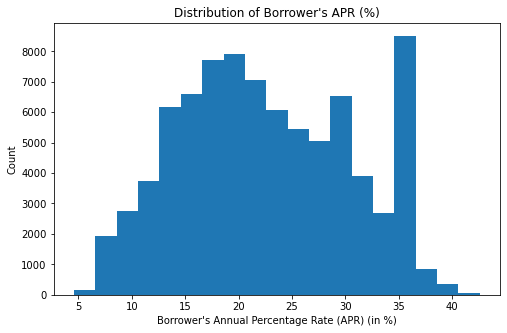

In [19]:
# plotting the distribution of the borrower APR
binsize = 2
borrower_apr = loan_df['BorrowerAPR']*100  #converting it to a percentage format

bins = np.arange(loan_df['BorrowerAPR'].min()*100, loan_df['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.title("Distribution of Borrower's APR (%)")
plt.hist(x = borrower_apr, bins = bins)
plt.xlabel("Borrower's Annual Percentage Rate (APR) (in %)")
plt.ylabel("Count")
plt.show()


> The above visualization is somewhat a multimodal distribution. As can be seen, at 35%, there is the highest peak, which indicates that the majority of the loans have an annual percentage rate of 35%. Also, at 20% there is a second peak. 5% had the least APR count.

The next visualization is the **distribution of "BorrowerRate"**. The borrower rate is the interest rate for the loan. <br>
The borrower rate differ from the borrower APR in the sense that the APR consists of the interest rate (or borrower rate) plus other fees or costs involved in procuring the loan.

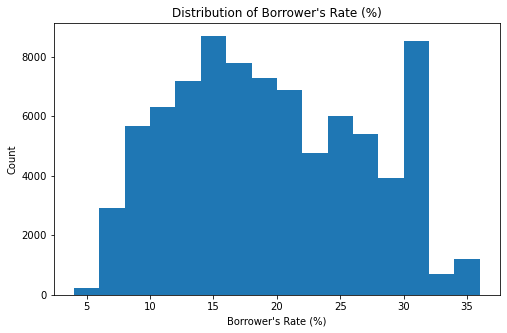

In [20]:
# plotting the distribution of the borrower rate
binsize = 2
borrower_rate = loan_df['BorrowerRate']*100  #converting it to a percentage format

bins = np.arange(loan_df['BorrowerRate'].min()*100, loan_df['BorrowerRate'].max()*100+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.title("Distribution of Borrower's Rate (%)")
plt.hist(x = borrower_rate, bins = bins)
plt.xlabel("Borrower's Rate (%)")
plt.ylabel("Count")
plt.show()


> The above visualization is somewhat a multimodal distribution. At about 31%, there is the highest peak, which indicates that the majority of the loans have an interest rate of 31%. Also, at 16% there is a second peak. 5% had the least interest rate.

The next visualization is the **distribution of "LoanStatus"**. The loan status is the current status of the loan. <br>
The loan status is a nominal categorical data. It would be plotted on a bar chart (countplot)

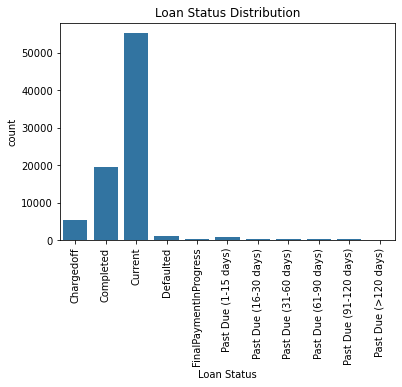

In [21]:
# plotting the loan status
base_color = sb.color_palette()[0]
sb.countplot(data=loan_df, x= 'LoanStatus', color=base_color)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.xticks(rotation=90);

> Based on the above distribution, most of the loans are still in the current state (that is, not yet paid)

The next visualization is the **distribution of "ProsperScore"**. The Prosper score is a custom risk score built using historical Prosper data. The higher the score, the lower the risk. <br>
The Prosper score is a nominal categorical data. It would be plotted on a bar chart (countplot)

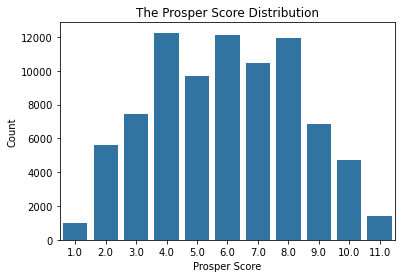

In [22]:
# plotting the Prosper score
sb.countplot(data=loan_df, x= 'ProsperScore', color=base_color)
plt.title('The Prosper Score Distribution')
plt.xlabel('Prosper Score')
plt.ylabel('Count');

> The above visualization assumes a normal distribution. Scores 4.0, 6.0 and 8.0 had the highest count.

The next visualization is the **distribution of "Term"**. The term is the length of the loan in months

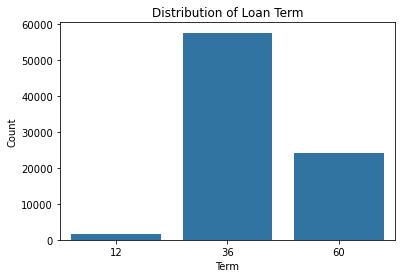

In [23]:
# plotting the Term of the loan
sb.countplot(data=loan_df, x= 'Term', color=base_color)
plt.title('Distribution of Loan Term')
plt.xlabel('Term')
plt.ylabel('Count');

> Based on the above visualization, most of the loan term falls within 36 months (that is, 3 years)

The next visualization is the **distribution of "ProsperRating (Alpha)"**. The Prosper Rating is expressed as a letter grade that indicates the expected level of risk associated with a loan listing. Each letter grade corresponds to an estimated average annualized loss rate range. A Proper Rating of 0 = N/A, 1 = HR, 2 = E, 3 = D, 4 = C, 5 = B, 6 = A, 7 = AA

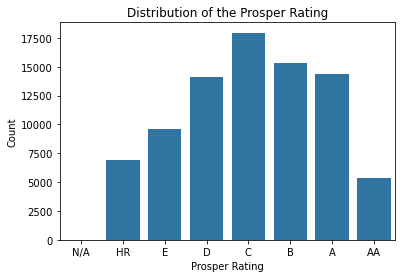

In [24]:
# plotting the Prosper Rating
sb.countplot(data=loan_df, x= 'ProsperRating (Alpha)', color=base_color)
plt.title('Distribution of the Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Count');

> Based on the above visualization, most of the Prosper Rating is C, which indicates medium risk associated with the loan listing

The next visualization is the **distribution of "ListingCategory (numeric)"**. The listing category is just basically the reason for obtaining the loan. <br>
The listing category is interpreted as follows: <br>
0 = Not Available, 1 = Debt Consolidation, 2 = Home Improvement, 3 = Business, 4 = Personal Loan, 5 = Student Use, 6 = Auto, 7 = Other, 8 = Baby&Adoption, 9 = Boat, 10 = Cosmetic Procedure, 11 = Engagement Ring, 12 = Green Loans, 13 = Household Expenses, 14 = Large Purchases, 15 = Medical/Dental, 16 = Motorcycle, 17 = RV, 18 = Taxes, 19 = Vacation, 20 = Wedding Loans.

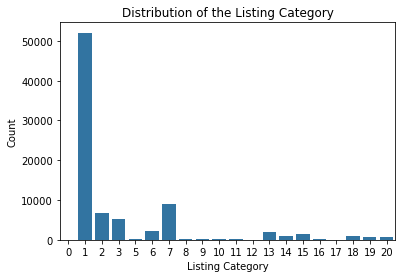

In [25]:
# plotting the Listing Category
sb.countplot(data=loan_df, x= 'ListingCategory (numeric)', color=base_color)
plt.title('Distribution of the Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('Count');

> Based on the above visualization, most of the Listing Category is 1, which indicates Debt Consolidation

The next visualization is the **distribution of "EmploymentStatus"**. 
The employment status of the borrower at the time they posted the listing

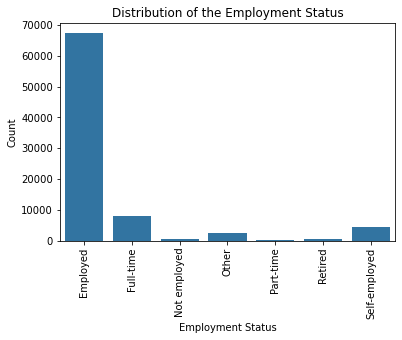

In [26]:
# plotting the Employment Status
sb.countplot(data=loan_df, x= 'EmploymentStatus', color=base_color)
plt.title('Distribution of the Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=90);

> Based on the above visualization, most of the borrowers are employed. The least distribution is that of Part-time

The next visualization is the **distribution of "IncomeRange"**. The income range of the borrower at the time the listing was created.

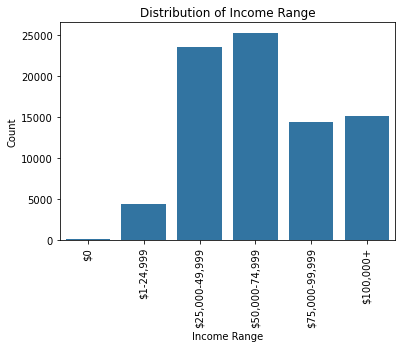

In [52]:
# plotting the Income Range
sb.countplot(data=loan_df, x= 'IncomeRange', color=base_color)
plt.title('Distribution of Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=90);

> Based on the above visualization, the income of most of the borrowers falls within the range of \\$50000-\\$74999. <br>
The least income range is \\$1-\\$24,999

The next visualization is the **distribution of "Occupation"**. The Occupation selected by the Borrower at the time they created the listing.

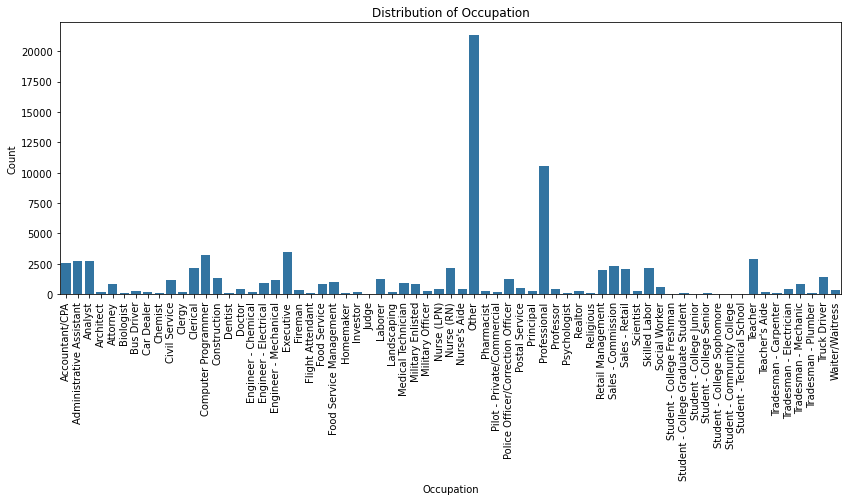

In [28]:
# plotting the Occupation
plt.figure(figsize=[14, 5])

sb.countplot(data=loan_df, x= 'Occupation', color=base_color)
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90);

> From the above visualization, the highest peak is 'Other', and the next to it is that of 'Professional'

The next visualization is the **distribution of "BorrowerState"**. The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

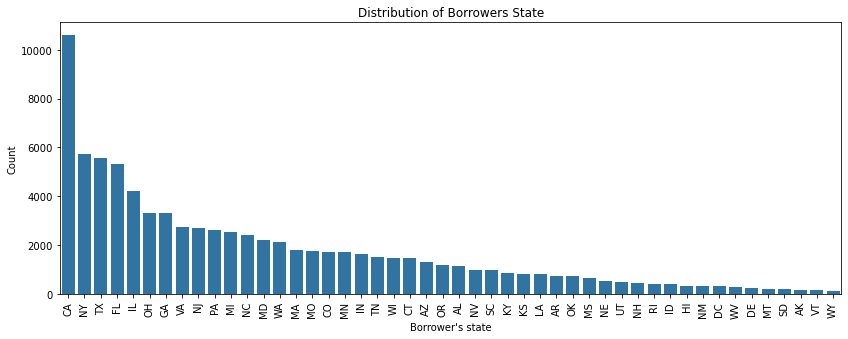

In [29]:
# plotting the Borrower's state
ordered = loan_df['BorrowerState'].value_counts().index

plt.figure(figsize=[14, 5])

sb.countplot(data=loan_df, x= 'BorrowerState', color=base_color, order=ordered)
plt.title('Distribution of Borrowers State')
plt.xlabel("Borrower's state")
plt.ylabel('Count')
plt.xticks(rotation=90);

> From the above visualization, the state with the highest number of borrowers is CA (California). Other states like NY (New York), FL (Florida), TX (Texas), IL (Illinois) have good numbers too. <br>
States like AK (Alaska), WY (Wyoming), VT (Vermont) have the lowest distribution

The next visualization is the **distribution of "LoanOriginationDate" by Year**. This is the year the loan was originated

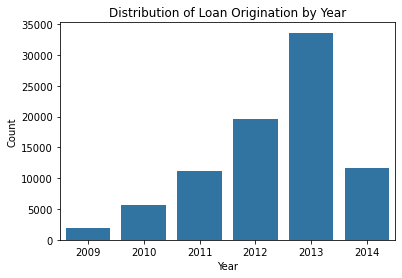

In [30]:
# plotting the loan origination by year
sb.countplot(data=loan_df, x=loan_df['LoanOriginationDate'].dt.year, color=base_color)
plt.title('Distribution of Loan Origination by Year')
plt.xlabel('Year')
plt.ylabel('Count');

> From the above visualization, the year with the highest number of loans is 2013, and the least is 2009

The next visualization is the **distribution of "LoanOriginalAmount"**. This is the origination amount of the loan (that is, the original loan amount taken)

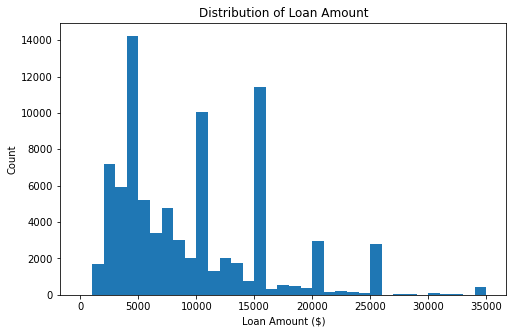

In [33]:
# plotting the distribution of the loan amount
binsize = 1000

bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.title("Distribution of Loan Amount")
plt.hist(data=loan_df, x = "LoanOriginalAmount", bins = bins)
plt.xlabel("Loan Amount ($)")
plt.ylabel("Count")
plt.show()

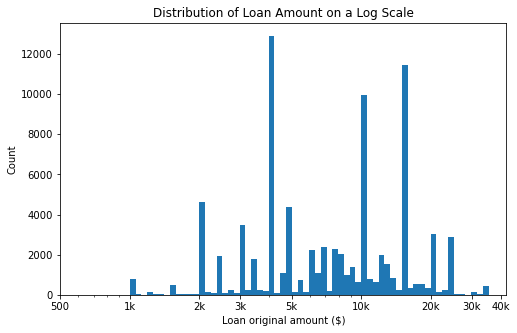

In [51]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loan_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.title("Distribution of Loan Amount on a Log Scale")
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 4e4], [500, '1k', '2k', '3k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('Loan original amount ($)')
plt.ylabel('Count')
plt.show()

> From the above visualization, the highest loan amount falls between \\$3k and \\$5k. There are also some peaks between \\$10k and \\$20k.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed log transformation on the LoanOriginalAmount. It was a rightly-skewed distribution and needed more interpretability.
Based on the visualizations done, most persons took loans between the range of \\$3000 and \\$5000. Year 2013 had the highest number of borrowers and the state with the highest number of borrowers was California (CA). <br>
Most of the borrowers are employed and earned within the range of \\$50000 and \\$74999. On the basis of Listing Category, most loans were collected on the basis of debt consolidation, and most of the loans had a Prosper Rating of C, which indicates medium risk associated with the loan listing. The loan term with the highest distribution is 36 months. <br>
Most of the loans had Prosper scores of 4.0, 6.0 and 8.0. Most of the loans are still in the current state (that is, not yet paid), in terms of loan status. Majority of the loans have an interest rate of 31%. <br>
Furthermore, most loans had an annual percentage rate (APR) of 35%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The loan original amount had long-tailed, skewed distribution, and this was checked on a log scale to show the hidden distribution in some areas, and hence, increase its interpretability.

<a id='bivariate exploration'></a>
## Bivariate Exploration

> In this section, I investigated relationships between pairs of variables in the
data. <br>
First, I want to look at the pairwise correlation between features in the data

In [53]:
# identifying which features are numeric or categorical
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 20 columns):
ListingCreationDate          83520 non-null datetime64[ns]
Term                         83520 non-null int64
LoanStatus                   83520 non-null category
BorrowerAPR                  83520 non-null float64
BorrowerRate                 83520 non-null float64
LenderYield                  83520 non-null float64
ProsperRating (Alpha)        83520 non-null category
ProsperScore                 83520 non-null float64
ListingCategory (numeric)    83520 non-null category
BorrowerState                83520 non-null category
Occupation                   83520 non-null category
EmploymentStatus             83520 non-null category
AmountDelinquent             83520 non-null float64
IncomeRange                  82871 non-null category
StatedMonthlyIncome          83520 non-null float64
LoanKey                      83520 non-null object
LoanOriginalAmount           83520 non-null int

In [54]:
# grouping the features into numeric and categorical

numeric_var = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
               'AmountDelinquent', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LP_ServiceFees', 'Investors']

categorical_var = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

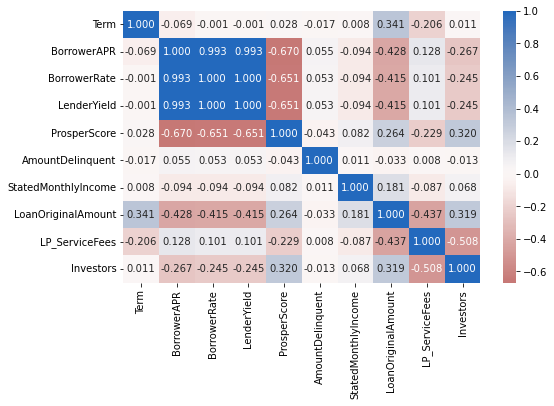

In [55]:
# plotting a correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[numeric_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:834: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:835: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


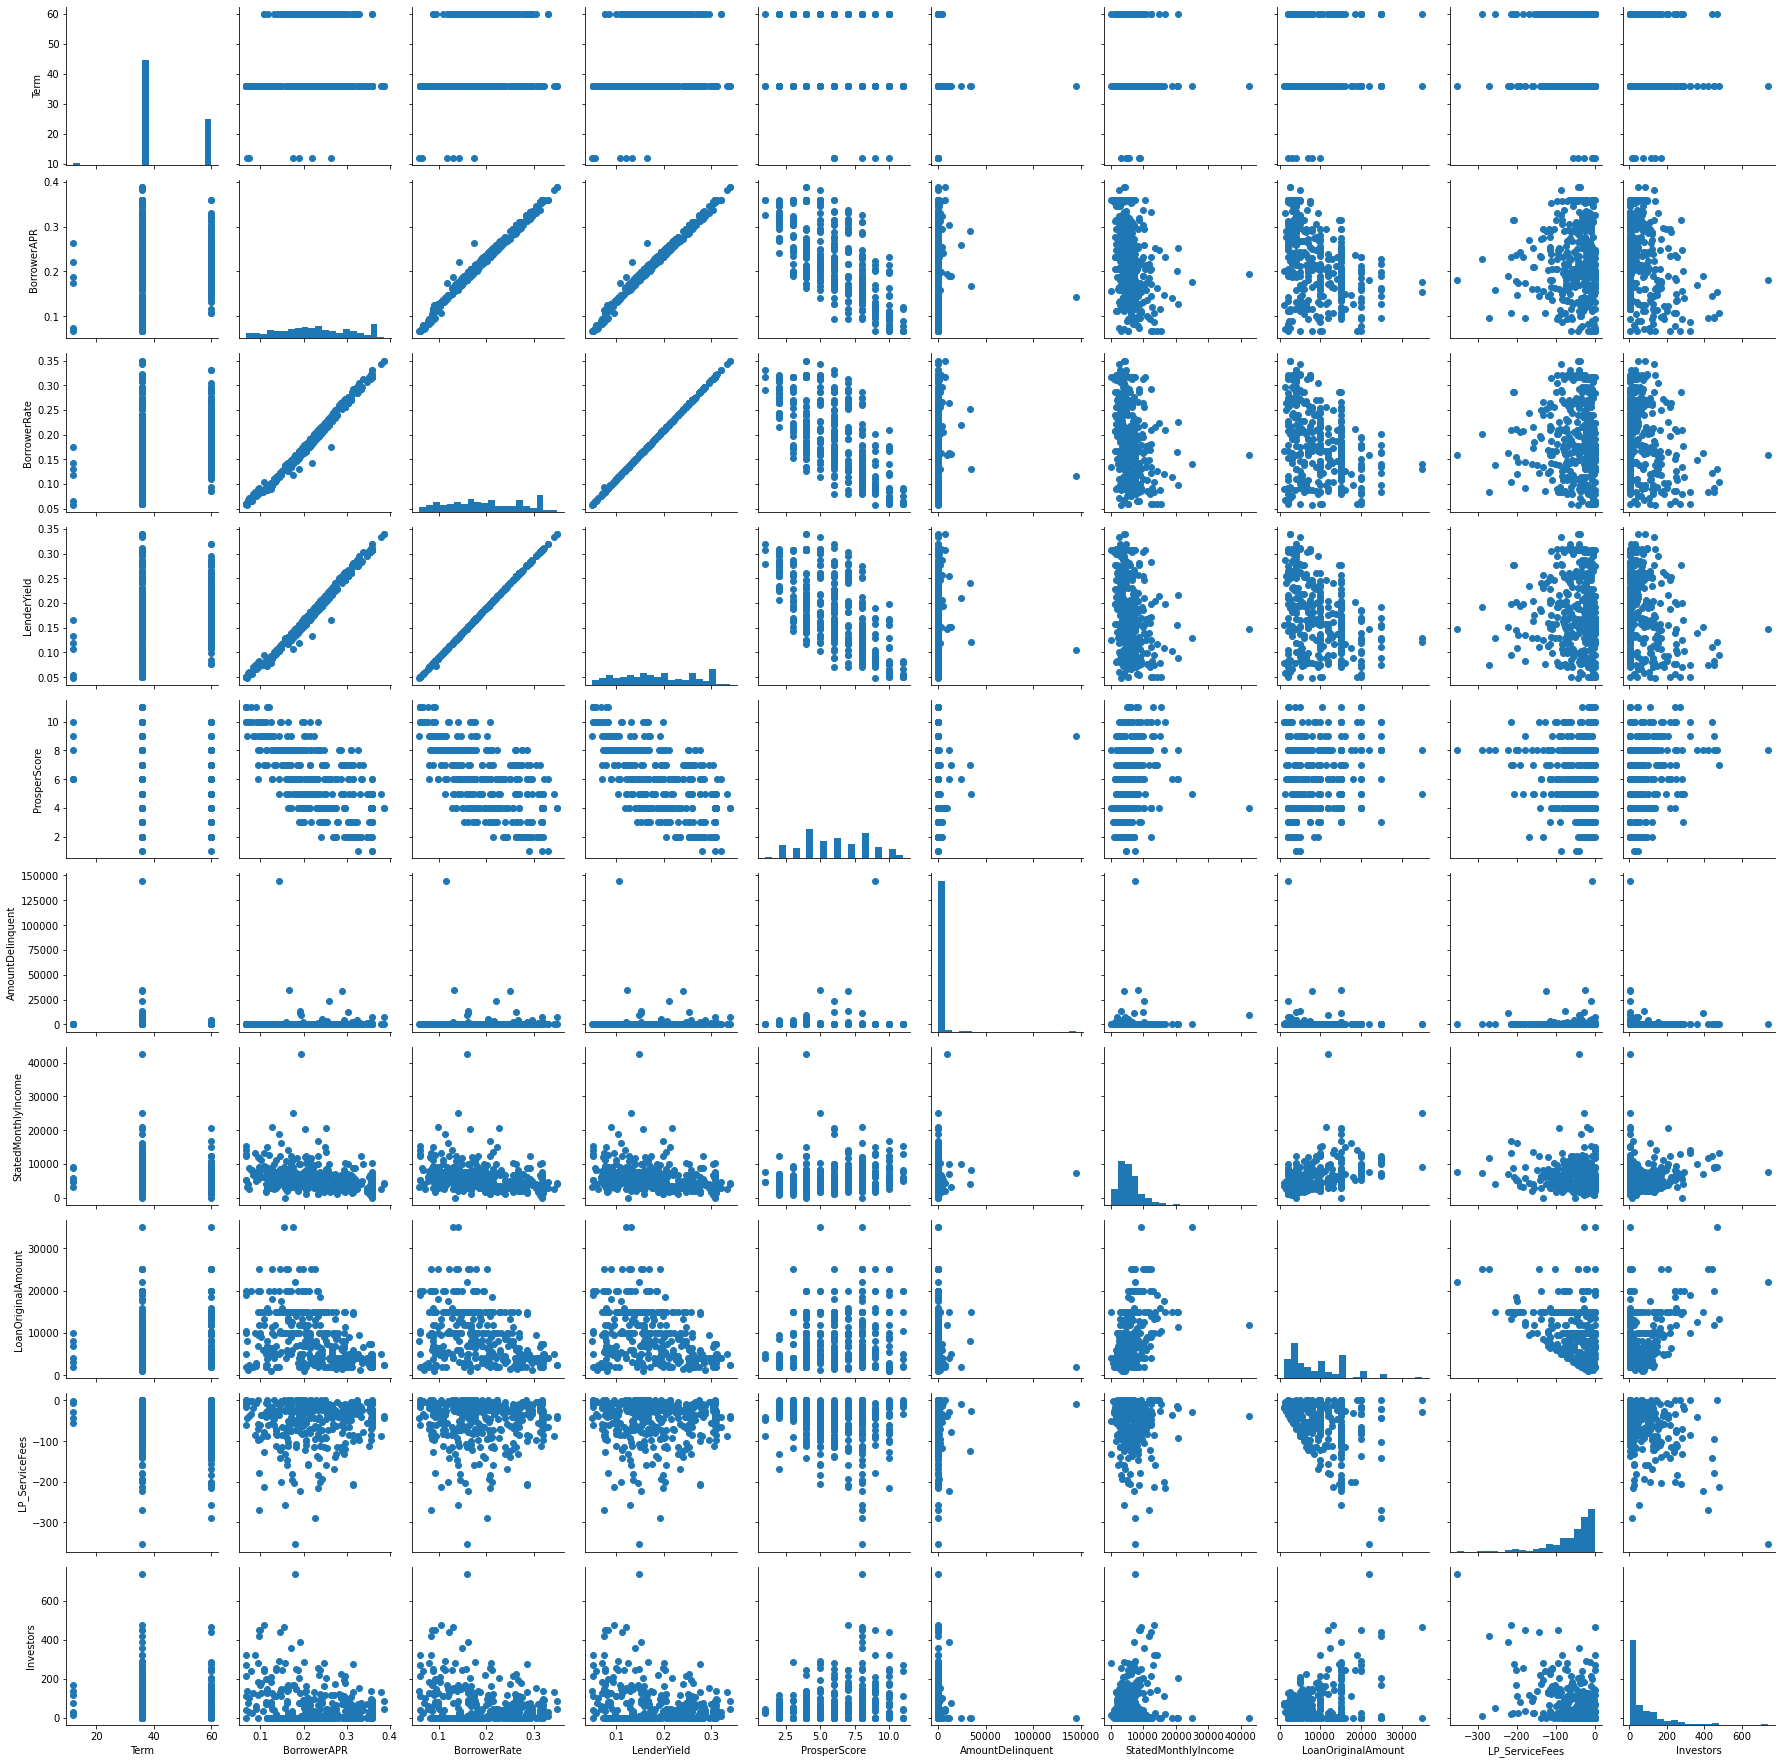

In [57]:
# plot matrix: sample 500 loan listings so that plots are clearer 

samples = np.random.choice(loan_df.shape[0], 500, replace = False)
loan_samp = loan_df.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

> As can be seen above, there is a strong positive correlation (as seen from the straight line) between BorrowerAPR and BorrowerRate, which is expected, because the APR is the interest rate (or borrower rate) plus other fees or costs involved in procuring the loan. Also, there are strong positive correlations between BorrowerAPR and LenderYield, BorrowerRate and LenderYield,
However, negative correlation exists between ProsperScore and BorrowerAPR, and ProsperScore and LenderYield.

I'd be visualizing **the relationship between BorrowerAPR and LenderYield**

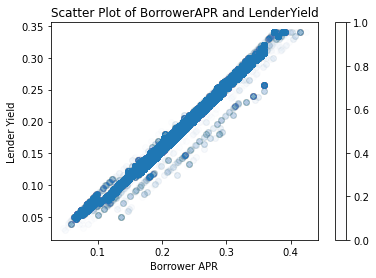

In [62]:
# plotting the relationship between BorrowerAPR and LenderYield
plt.scatter(data = loan_df, x = 'BorrowerAPR', y = 'LenderYield',  alpha =  0.01)
plt.title('Scatter Plot of BorrowerAPR and LenderYield')
plt.xlabel('Borrower APR')
plt.ylabel('Lender Yield');
plt.colorbar();

> Based on the above visualization, it can be seen that the relationship between BorrowerAPR and LenderYield is a positive correlation

I'd be also visualizing **the relationship between BorrowerAPR and LoanOriginalAmount**

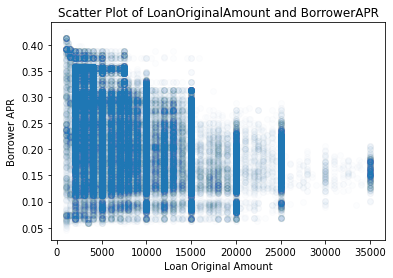

In [84]:
# plotting the relationship between BorrowerAPR and LoanOriginalAmount
plt.scatter(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR');

> From the above visualization, it can be seen that the smaller loan amounts had higher APRs compared to the larger loan amounts

I'd be also visualizing **the relationship between BorrowerAPR and EmploymentStatus**

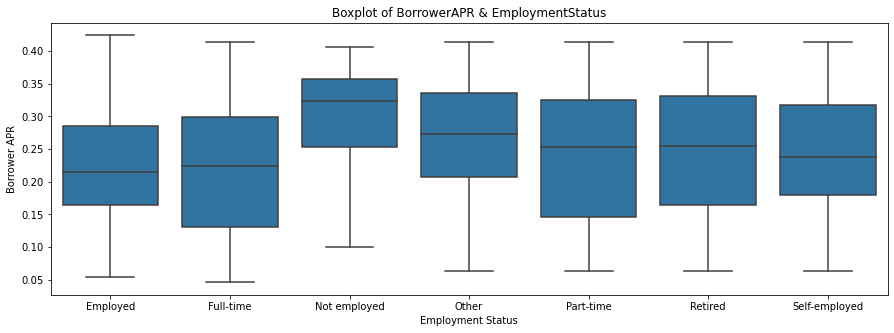

In [79]:
# plotting the relationship between BorrowerAPR and EmploymentStatus
plt.figure(figsize=[15,5])
plt.title('Boxplot of BorrowerAPR & EmploymentStatus')
sb.boxplot(data=loan_df, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xlabel('Employment Status')
plt.ylabel('Borrower APR');

> Based on the above visualization, the 'employed' had the lower APR compared to the 'not employed'

I'd be also visualizing **the relationship between BorrowerAPR and ProsperRating**

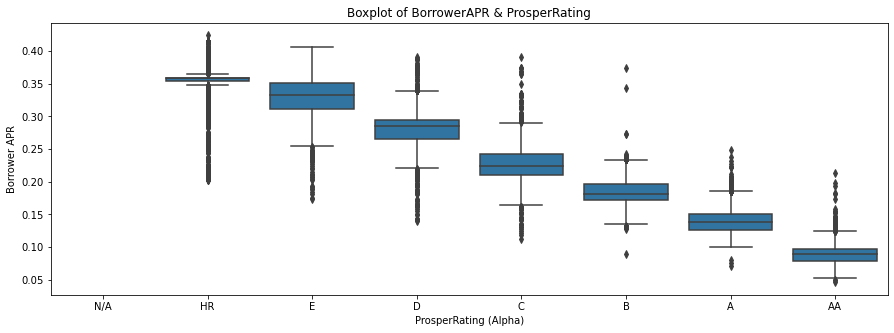

In [81]:
# plotting the relationship between BorrowerAPR and ProsperRating (Alpha)
plt.figure(figsize=[15,5])
plt.title('Boxplot of BorrowerAPR & ProsperRating')
sb.boxplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('Borrower APR');

> Based on the above visualization, loans with an HR Prosper rating have higher APR (annual percentage rate) compared to the others. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between the borrower's APR and lender's yield is a positive linear correlation. The higher the APR, the higher the lender's yield and vice versa.
Also, the smaller loan amounts had higher APRs compared to the larger loan amounts.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From the sample correlation matrix plot for numeric variables, it can be seen that:
    > * loans that have a Loan Term of 36 months have more number of investors compared to loans of 12 months and 60 months
    > * the higher the Prosper Score, the lower the Borrower APR, Borrower Rate and Lender Yield

<a id='multivariate exploration'></a>
## Multivariate Exploration

> In this section, I performed further investigation into the dataset

A visualization of **the borrower's APR across lender yield and Prosper score**

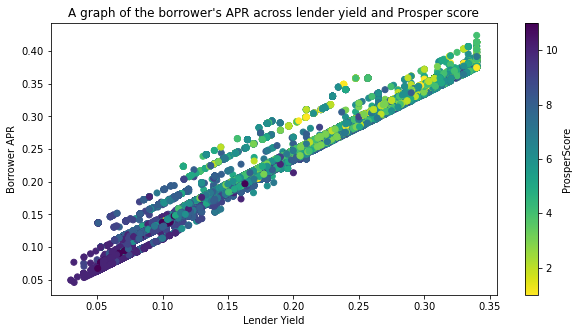

In [86]:
# Plotting a graph of LenderYield vs BorrowerAPR  vs ProsperScore
plt.figure(figsize = [10, 5])
plt.scatter(data=loan_df, x='LenderYield', y = 'BorrowerAPR', c='ProsperScore', cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore')
plt.title("A graph of the borrower's APR across lender yield and Prosper score")
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR');

> Based on the above visualization, it can be seen that the higher Prosper scores tend to be distributed along the low borrower's APR and lender yield points. That is, the higher the Prosper score, the lower the borrower's APR and lender's yield

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I looked at the relationship between ProsperScore, BorrowerAPR and LenderYield in this section, and as seen in the above visualization, the higher the Prosper score, the lower the borrower's APR and lender's yield, and vice versa 

### Were there any interesting or surprising interactions between features?

> The higher Prosper scores tend to be distributed along the low borrower's APR and lender yield points.

<a id='conclusions'></a>
## Conclusions
> The insights gotten from exploratory analysis on Prosper Loan data is as follows: <br>
> 1. Most persons took loans between the range of \\$3000 and \\$5000. 
> 2. Year 2013 had the highest number of borrowers and the state with the highest number of borrowers was California (CA).
> 3. Most of the borrowers are employed and earned within the range of \\$50000 and \\$74999. 
> 4. On the basis of Listing Category, most loans were collected on the basis of debt consolidation.
> 5. Most of the loans had a Prosper Rating of C, which indicates medium risk associated with the loan listing.
> 6. The loan term with the highest distribution is 36 months.
> 7. Most of the loans had Prosper scores of 4.0, 6.0 and 8.0. 
> 8. Most of the loans are still in the current state (that is, not yet paid), in terms of loan status. 
> 9. Majority of the loans have an interest rate of 31%. 
> 10. Most loans had an annual percentage rate (APR) of 35%.
> 11. The higher the APR, the higher the lender's yield and vice versa.
> 12. The smaller loan amounts had higher APRs compared to the larger loan amounts.
> 13. Loans that have a Loan Term of 36 months have more number of investors compared to loans of 12 months and 60 months
> 14. The higher the Prosper Score, the lower the Borrower APR, Borrower Rate and Lender Yield